<a href="https://colab.research.google.com/github/pirsquared/Colaboratory/blob/master/CountStateChange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
import pandas as pd
import numpy as np
from timeit import timeit

pd.set_option(
    'display.notebook_repr_html', False,
    'expand_frame_repr', False,
    'display.max_colwidth', 50
)

%matplotlib inline

# [how-to-count-the-number-of-state-change-in-pandas](https://stackoverflow.com/a/53190603/2336654)

# Functions

In [0]:
def pir_xor(df):
  v = df.values
  return pd.Series((v[1:] ^ v[:-1]).sum(0), df.columns)

def pir_diff1(df):
  v = df.values
  return pd.Series(np.abs(np.diff(v, axis=0)).sum(0), df.columns)

def pir_diff2(df):
  v = df.values
  return pd.Series(np.diff(v.astype(np.bool), axis=0).sum(0), df.columns)

def cold(df):
  return df.ne(df.shift(-1)).sum(0) - 1

def jez(df):
  return df.rolling(2).apply(lambda x: x[0] != x[-1]).sum().astype(int)

def naga(df):
  return df.diff().abs().sum().astype(int)


## Testing

In [0]:
np.random.seed([3, 1415])

idx = [a * 10 ** b for b in range(1, 6) for a in [1, 3]]
col = 'pir_xor pir_diff1 pir_diff2 cold jez naga'.split()
res = pd.DataFrame(np.nan, idx, col)

for i in idx:
  df = pd.DataFrame(np.random.choice([0, 1], size=(i, 3)), columns=[*'abc'])
  for j in col:
    stmt = f"{j}(df)"
    setp = f"from __main__ import {j}, df"
    res.at[i, j] = timeit(stmt, setp, number=100)

## Results
Divide each row by the minimum for that row.  The resulting `DataFrame` will show `1` for the method what was fastest for that rows sized input.  Each other column will show how many times longer it took relative to the fastest method.

In [13]:
res.div(res.min(1), 0)

        pir_xor  pir_diff1  pir_diff2       cold         jez      naga
10          1.0   1.104605   1.460004  23.029604   17.985967  6.956112
30          1.0   1.160922   1.170826  23.267328   19.911895  7.619579
100         1.0   1.076230   1.123510  22.116657   20.748737  7.257605
300         1.0   1.149587   1.205330  22.709190   26.604307  7.729752
1000        1.0   1.142708   1.270273  19.988952   38.409233  6.712393
3000        1.0   1.181403   1.381492  16.574421   62.748852  5.852130
10000       1.0   1.193205   1.532198  11.737763   98.649642  4.572863
30000       1.0   1.285822   1.435110   8.073300  109.580358  3.636565
100000      1.0   1.288252   1.499706   6.726517  123.905816  3.245352
300000      1.0   1.272545   1.537031   6.336648  130.239846  3.131928

### Chart
In loglog space.

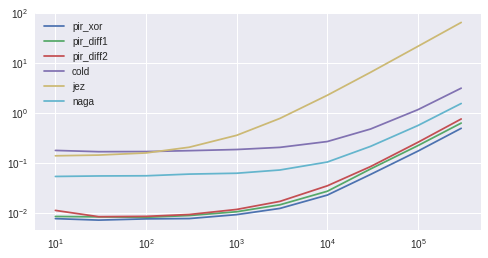

In [14]:
res.plot(loglog=True, figsize=(8, 4))